# Motorcycle Parts Sales Analysis

In [8]:
# ! conda init
# ! conda activate data_env
# ! conda install pandas numpy seaborn -y

In [9]:
from operator import itemgetter
from collections import OrderedDict

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

## Sample of the Data

In [93]:
np.set_printoptions(precision=3)
df = pd.read_csv("sales_data.csv")
df.head(n=10).style.hide(axis='index') \
    .set_properties(**{'text-align': 'left'}) \
    .format({'unit_price': '${:.2f}', 'total': '${:.2f}'}) \
    .set_table_styles([{'selector': '.col_heading', 'props': [('text-align', 'left')]}])


date,warehouse,client_type,product_line,quantity,unit_price,total,payment
2021-06-01,Central,Retail,Miscellaneous,8,$16.85,$134.83,Credit card
2021-06-01,North,Retail,Breaking system,9,$19.29,$173.61,Cash
2021-06-01,North,Retail,Suspension & traction,8,$32.93,$263.45,Credit card
2021-06-01,North,Wholesale,Frame & body,16,$37.84,$605.44,Transfer
2021-06-01,Central,Retail,Engine,2,$60.48,$120.96,Credit card
2021-06-01,North,Wholesale,Suspension & traction,40,$37.37,$1494.80,Transfer
2021-06-01,West,Retail,Electrical system,2,$27.20,$54.41,Credit card
2021-06-01,Central,Retail,Breaking system,10,$22.44,$224.38,Credit card
2021-06-01,West,Wholesale,Frame & body,40,$39.50,$1579.87,Transfer
2021-06-01,North,Retail,Frame & body,6,$45.44,$272.61,Credit card


### Total Sales by Payment Method: 

	- Credit card: $110271.57
	- Cash: $19199.1
	- Transfer: $159642.33


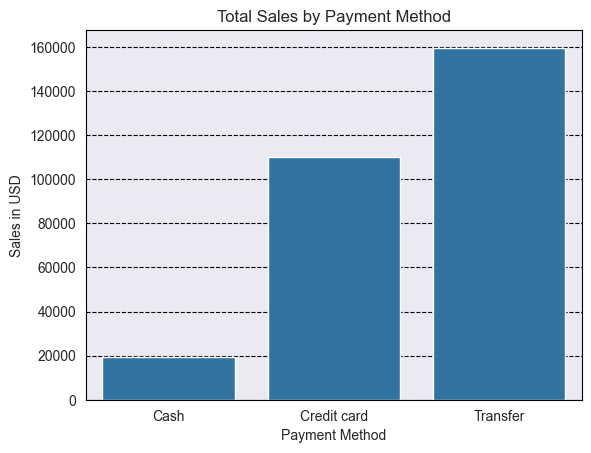

In [97]:
def fix_npfloat(float_num):
    return round(float(float_num), 2) 

def totalsales(payment_method):
    return sum(df.loc[df["payment"] == payment_method]["total"])

sales_by_payment = {paymentmethod: fix_npfloat(totalsales(paymentmethod)) for paymentmethod in df["payment"].unique()}
for i in sales_by_payment:
    print(f"\t- {i}: ${sales_by_payment[i]}")
def sort_dicts(d):
    return OrderedDict(sorted(d.items(), key=lambda t: t[1]))

sns.axes_style()

custom = {"axes.edgecolor": "black","grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = custom)

sns.barplot(sort_dicts(sales_by_payment)).set(title="Total Sales by Payment Method", xlabel="Payment Method", ylabel="Sales in USD")
plt.show()    

### Average Unit Price by Product Line:

	- Miscellaneous: $22.81
	- Breaking system: $17.74
	- Suspension & traction: $33.97
	- Frame & body: $42.83
	- Engine: $60.09
	- Electrical system: $25.59


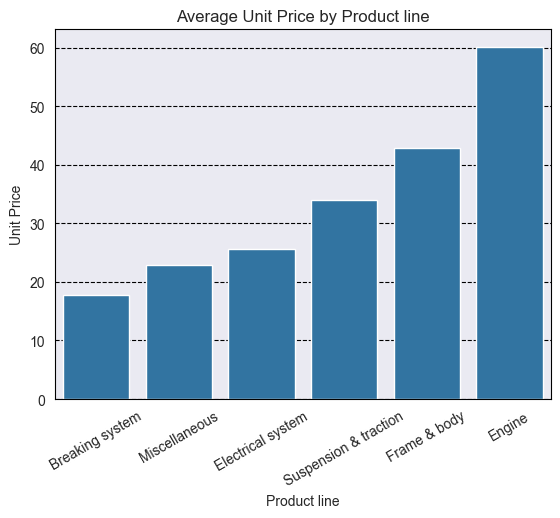

In [96]:
def avg_unitprice(productline):
    return np.average(df.loc[df["product_line"] == productline]["unit_price"])
unitprice_by_productline = {productline: fix_npfloat(avg_unitprice(productline)) for productline in df["product_line"].unique()}
for i in unitprice_by_productline:
    print(f"\t- {i}: ${unitprice_by_productline[i]}")
plt.xticks(rotation=30)
sns.barplot(data=sort_dicts(unitprice_by_productline)).set(title="Average Unit Price by Product line", xlabel="Product line", ylabel="Unit Price")
plt.show()    